<a href="https://colab.research.google.com/github/shand07/MLA_SPH/blob/main/MLA1_SPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 1<br>
Sean Hand<br>
CS430<br>
Machine Learning in the Cloud<br>




In [77]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
df = pd.read_csv('/content/drive/MyDrive/CS 430/Assignment 1/weather_2012.csv')
df[:-4]



,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8775,2012-12-31 15:00:00,-2.3,-4.6,84,9,9.7,100.47,Snow
8776,2012-12-31 16:00:00,-1.4,-4.0,82,13,12.9,100.40,Snow
8777,2012-12-31 17:00:00,-1.1,-3.3,85,19,9.7,100.30,Snow
8778,2012-12-31 18:00:00,-1.3,-3.1,88,17,9.7,100.19,Snow


In [79]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
7945,2012-11-27 01:00:00,-9.0,-11.0,85,4,25.0,101.98,Clear
4930,2012-07-24 10:00:00,24.0,16.2,62,19,24.1,99.95,Mostly Cloudy
222,2012-01-10 06:00:00,0.7,-1.2,87,30,8.0,100.04,Snow
380,2012-01-16 20:00:00,-14.0,-18.3,70,13,25.0,101.19,Cloudy
4706,2012-07-15 02:00:00,24.5,18.9,71,9,25.0,101.28,Mainly Clear


In [80]:
df.dtypes

,0
Date/Time,object
Temp (C),float64
Dew Point Temp (C),float64
Rel Hum (%),int64
Wind Spd (km/h),int64
Visibility (km),float64
Stn Press (kPa),float64
Weather,object


In [81]:
df = df.rename(columns={'Date/Time': 'Date_Time','Temp (C)': 'Temp_C','Dew Point Temp (C)': 'Dew_Point','Rel Hum (%)':'Relative_Humidity','Wind Spd (km/h)':'Wind_Speed', 'Visibility (km)':'Visibility','Stn Press (kPa)':'Pressure','Weather':"Weather"	 })



In [82]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew_Point,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Relative_Humidity,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind_Speed,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Pressure,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


In [83]:
df.insert(1,'Temp_F',(df['Temp_C'] * 9/5)+ 32)
df.head()


,Date_Time,Temp_F,Temp_C,Dew_Point,Relative_Humidity,Wind_Speed,Visibility,Pressure,Weather
0,2012-01-01 00:00:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog


In [84]:
df.dtypes

,0
Date_Time,object
Temp_F,float64
Temp_C,float64
Dew_Point,float64
Relative_Humidity,int64
Wind_Speed,int64
Visibility,float64
Pressure,float64
Weather,object


In [85]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.dtypes


,0
Date_Time,datetime64[ns]
Temp_F,float64
Temp_C,float64
Dew_Point,float64
Relative_Humidity,int64
Wind_Speed,int64
Visibility,float64
Pressure,float64
Weather,object


In [86]:
jan2012_temp_f = df.loc[(df['Date_Time'] >= '2012-01-01') & (df['Date_Time'] <= '2012-01-31'), 'Temp_F']
feb2012_temp_f = df.loc[(df['Date_Time'] >= '2012-02-01') & (df['Date_Time'] <= '2012-02-29'), 'Temp_F']
mar2012_temp_f = df.loc[(df['Date_Time'] >= '2012-03-01') & (df['Date_Time'] <= '2012-03-31'), 'Temp_F']
apr2012_temp_f = df.loc[(df['Date_Time'] >= '2012-04-01') & (df['Date_Time'] <= '2012-04-30'), 'Temp_F']
may2012_temp_f = df.loc[(df['Date_Time'] >= '2012-05-01') & (df['Date_Time'] <= '2012-05-31'), 'Temp_F']
jun2012_temp_f = df.loc[(df['Date_Time'] >= '2012-06-01') & (df['Date_Time'] <= '2012-06-30'), 'Temp_F']
jul2012_temp_f = df.loc[(df['Date_Time'] >= '2012-07-01') & (df['Date_Time'] <= '2012-07-31'), 'Temp_F']
aug2012_temp_f = df.loc[(df['Date_Time'] >= '2012-08-01') & (df['Date_Time'] <= '2012-08-31'), 'Temp_F']
sep2012_temp_f = df.loc[(df['Date_Time'] >= '2012-09-01') & (df['Date_Time'] <= '2012-09-30'), 'Temp_F']
oct2012_temp_f = df.loc[(df['Date_Time'] >= '2012-10-01') & (df['Date_Time'] <= '2012-10-31'), 'Temp_F']
nov2012_temp_f = df.loc[(df['Date_Time'] >= '2012-11-01') & (df['Date_Time'] <= '2012-11-30'), 'Temp_F']
dec2012_temp_f = df.loc[(df['Date_Time'] >= '2012-12-01') & (df['Date_Time'] <= '2012-12-31'), 'Temp_F']

monthly_avg = pd.Series([jan2012_temp_f.mean(),
                         feb2012_temp_f.mean(),
                         mar2012_temp_f.mean(),
                         apr2012_temp_f.mean(),
                         may2012_temp_f.mean(),
                         jun2012_temp_f.mean(),
                         jul2012_temp_f.mean(),
                         aug2012_temp_f.mean(),
                         sep2012_temp_f.mean(),
                         oct2012_temp_f.mean(),
                         nov2012_temp_f.mean(),
                         dec2012_temp_f.mean()],
                        index=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

monthly_avg


,0
January,18.765381
February,24.554740
March,37.599223
April,44.535696
May,61.250374
June,67.995610
July,72.923911
August,72.070097
September,61.975552
October,51.687906


In [87]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


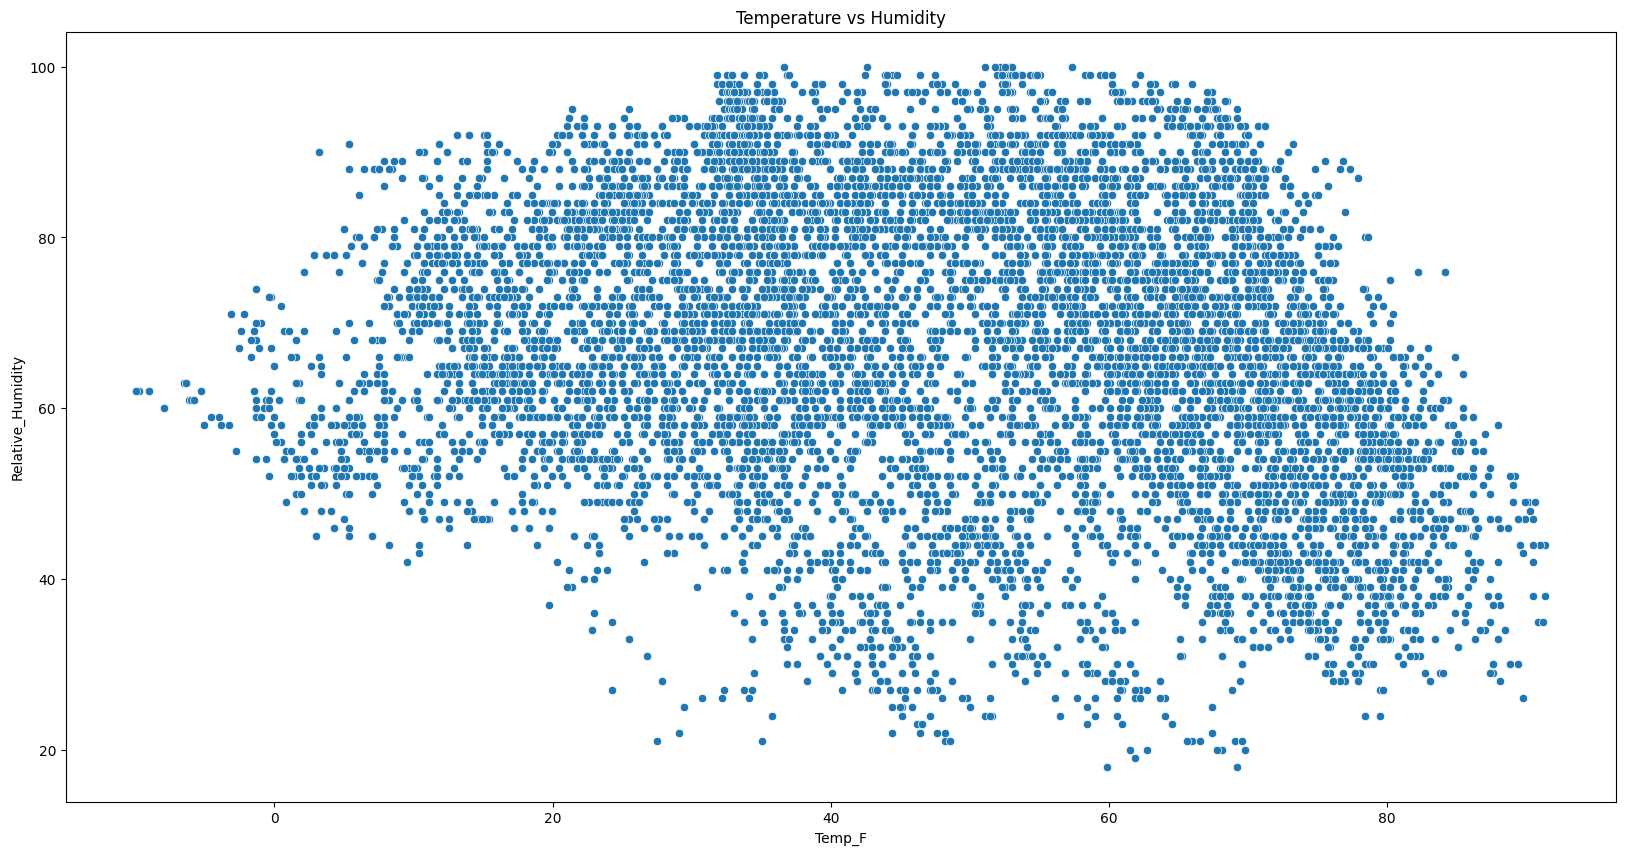

In [88]:
plt.figure(figsize =(20,10))
sns.scatterplot(x='Temp_F', y='Relative_Humidity', data=df )
plt.title('Temperature vs Humidity')


plt.show()


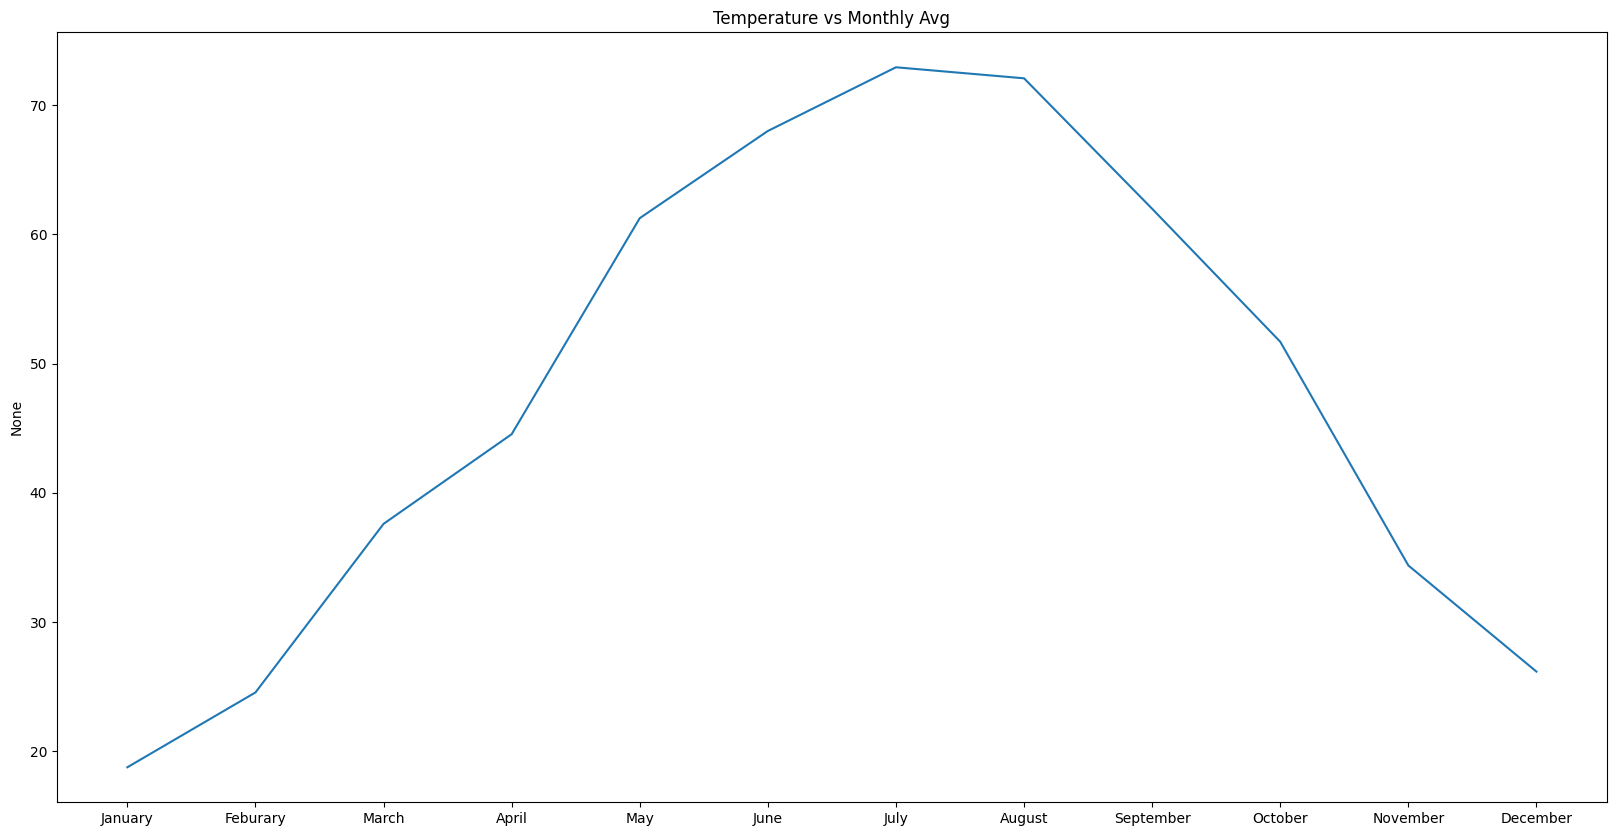

In [89]:
plt.figure(figsize=(20,10))
sns.lineplot(x=['January','Feburary','March','April','May','June','July','August','September','October','November','December'], y=monthly_avg )
plt.title('Temperature vs Monthly Avg')


plt.show()
#

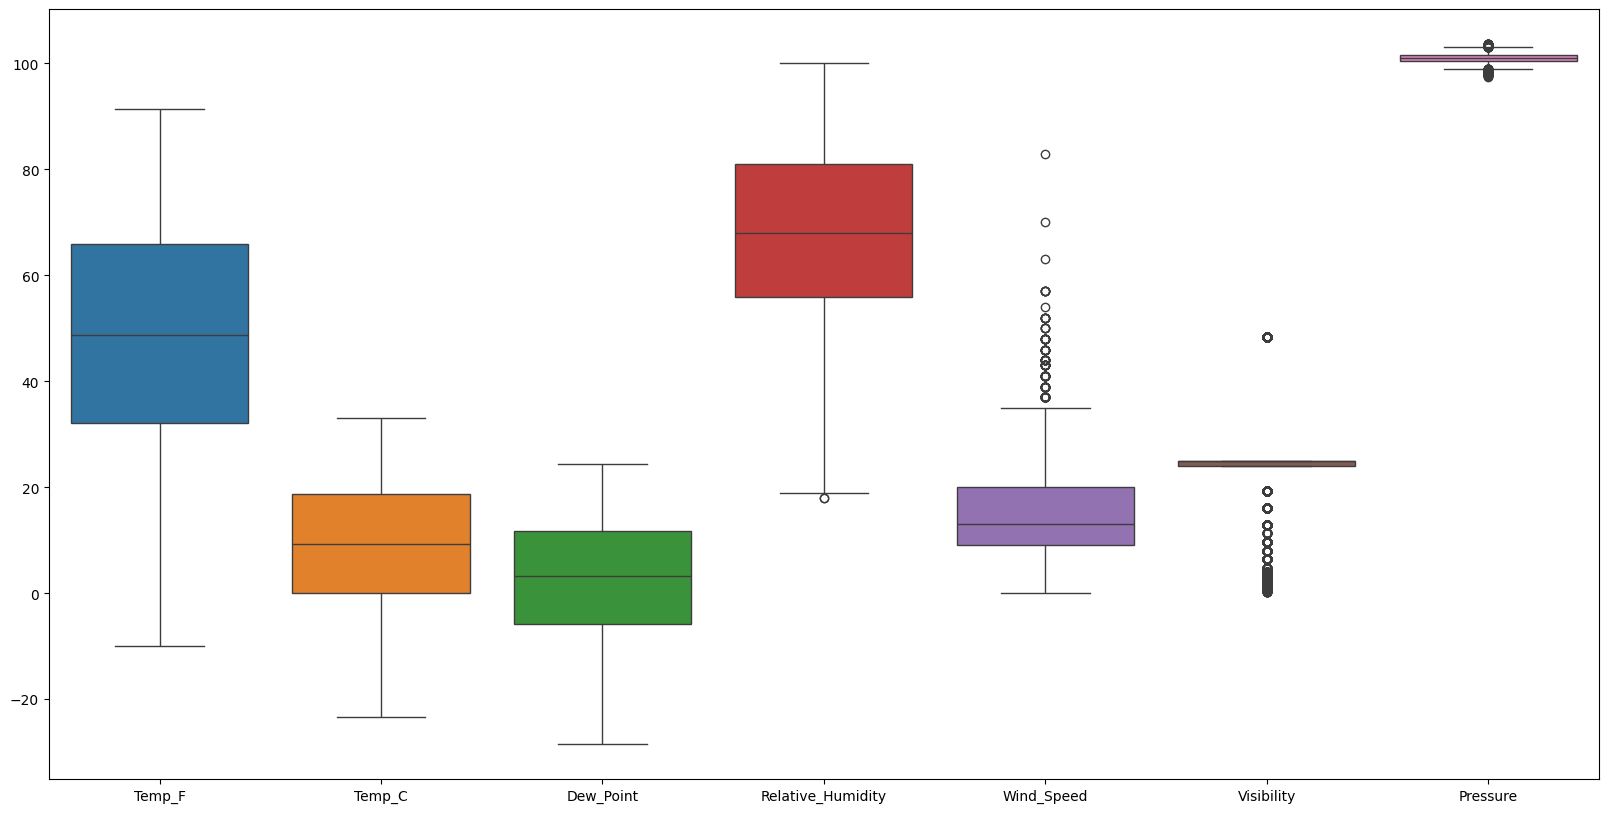

In [98]:
plt.figure(figsize=(20,10))


sns.boxplot(data = df)



plt.show()
#